This data is from: https://www.kaggle.com/zynicide/wine-reviews. The data's scraped from WineEthusiast and was made available for use on Kaggle.

Let's read in the data and take an initial look.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = "winemag-data_first150k.csv"
path = "C:/Data/Projects/Wine/"
data = pd.read_csv(path + filename)
data.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
data.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


We can immediately see a few things- the cheapest wine is 4 dollars, while the most expensive is 2300 dollars, with the mean price being 33. In terms of points, the worst wine comes in a 80 points, while the best comes in at 100. Even at 80 points I'd say that's pretty high- people like their wine!

# Cleaning #

Let's clean the data. First, let's check if there are any null values in the dataframe.

In [4]:
are_null_values = data.isnull().values.any()
num_nulls = data.isnull().sum()
print("Columns with null values:\n",num_nulls)
print("Number of observations:\n",len(data))

Columns with null values:
 Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64
Number of observations:
 150930


We have 45735 null values for designation, 13695 for price, 25060 for region_1, and 89977 for region_2. That means only about 40% of the data has a region_2 value- I don't want to drop all null values then, or else I'll be getting rid of 60% of my data. I don't think region_2 is that important, since we already have the country, province, and region_1. I'll go ahead and just drop region_2 from the dataframe. Then I'll drop rows that have null values- this will result in losing less data. Let's also drop "Unnamed: 0" since this is just a duplication of the index.

In [5]:
data = data.drop("region_2", axis = 1)
data = data[pd.notnull(data)] # drop if null values
data = data.drop("Unnamed: 0", axis = 1) # drop the first column
data.shape

(150930, 9)

Finally, we want to make sure that every description is unique. Some descriptions may be duplicated, which means a wine has been entered in the dataset twice. Let's ensure that every description appears only once, but first let's check to see if there are duplicates, then drop them accordingly.

In [6]:
data[data.duplicated('description', keep = False)].sort_values('description').head(5)

,country,description,designation,points,price,province,region_1,variety,winery
147725,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,Chardonnay,La Playa
62345,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,Chardonnay,La Playa
74993,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Cabernet Sauvignon,Mauritson
18803,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Cabernet Sauvignon,Mauritson
26530,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,Sauvignon Blanc,Neumeister


In [7]:
data = data.drop_duplicates("description") # drop duplicate descriptions
data.shape

(97821, 9)

In [8]:
# Make sure designation is all lower case to avoid repeats
data["designation"] = data["designation"].str.lower()

# Exploration 

Now that the data has been cleaned, let's do some exploration.

First we'll take a look at the overall distribution of the data.

In [9]:
import seaborn as sns

In [10]:
def plot_distribution(data,category,col, size):    
    # Look at the overall col distribution for a category (like country)
    sns.set_style("white")
    fig, ax = plt.subplots(figsize = size)
    chart = sns.boxplot(y=category,x=col, data=data, ax = ax)
    plt.xticks(rotation = 45)
    plt.title("Points distribution for each " + category + "\n" ,fontsize=20)
    plt.xlabel(col,fontsize=16)
    plt.ylabel("")
    plt.tick_params(labelsize=16)
    sns.despine(bottom=False)
    plt.show()

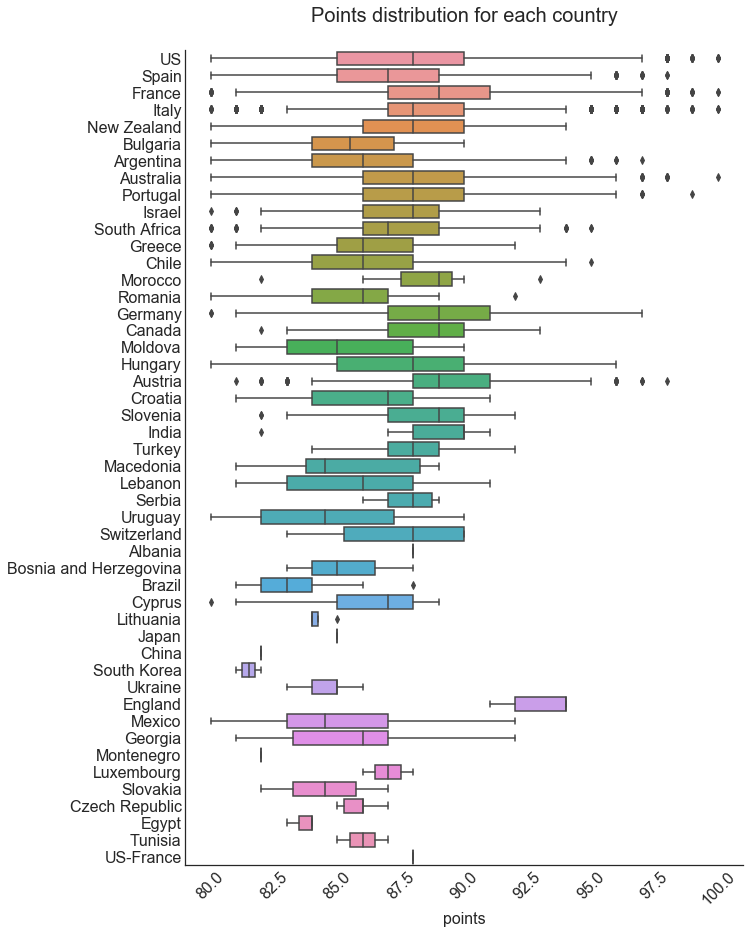

In [11]:
plot_distribution(data,"country","points", (10,15))

We can see that some countries have very low sample sizes, resulting in strange box plots. 

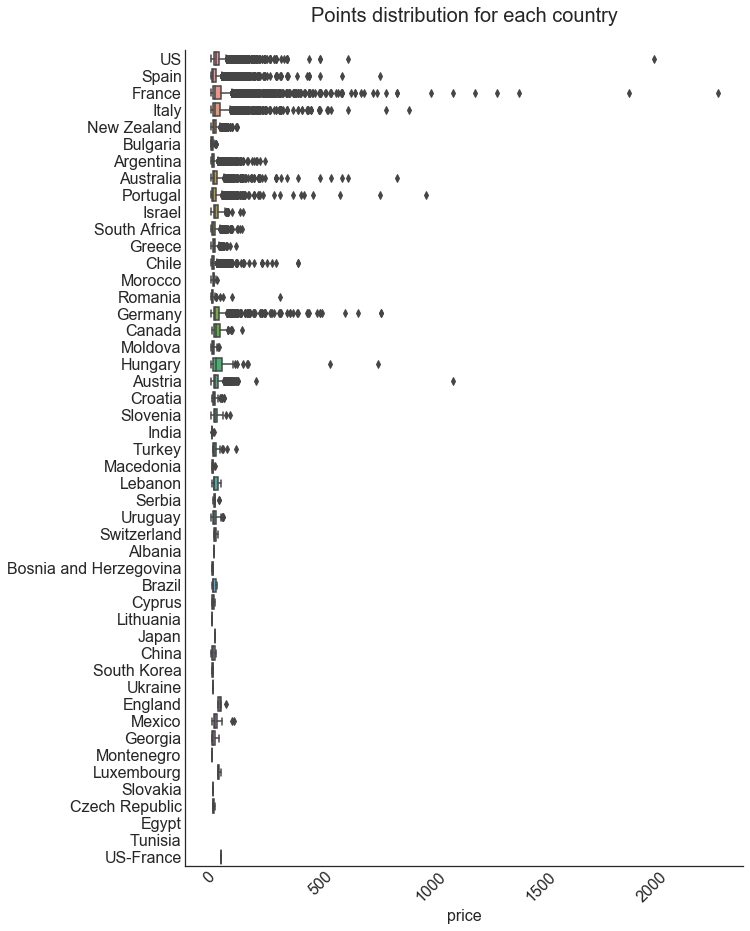

In [12]:
# Let's look at the price distribution
plot_distribution(data,"country","price", (10,15))

Looks like there's lots of price outliers! Let's look at the distribution of wines that cost less than 100 dollars.

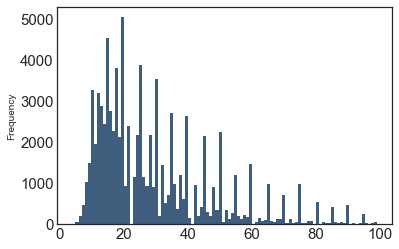

In [13]:
data_less_outliers = data[data["price"] < 100]
data_less_outliers.price.plot(kind = 'hist', bins = 100, color = "#3F5D7D", fontsize=15)

Still, the price is pretty jumpy, even when we remove wines that cost more than 100 dollars.

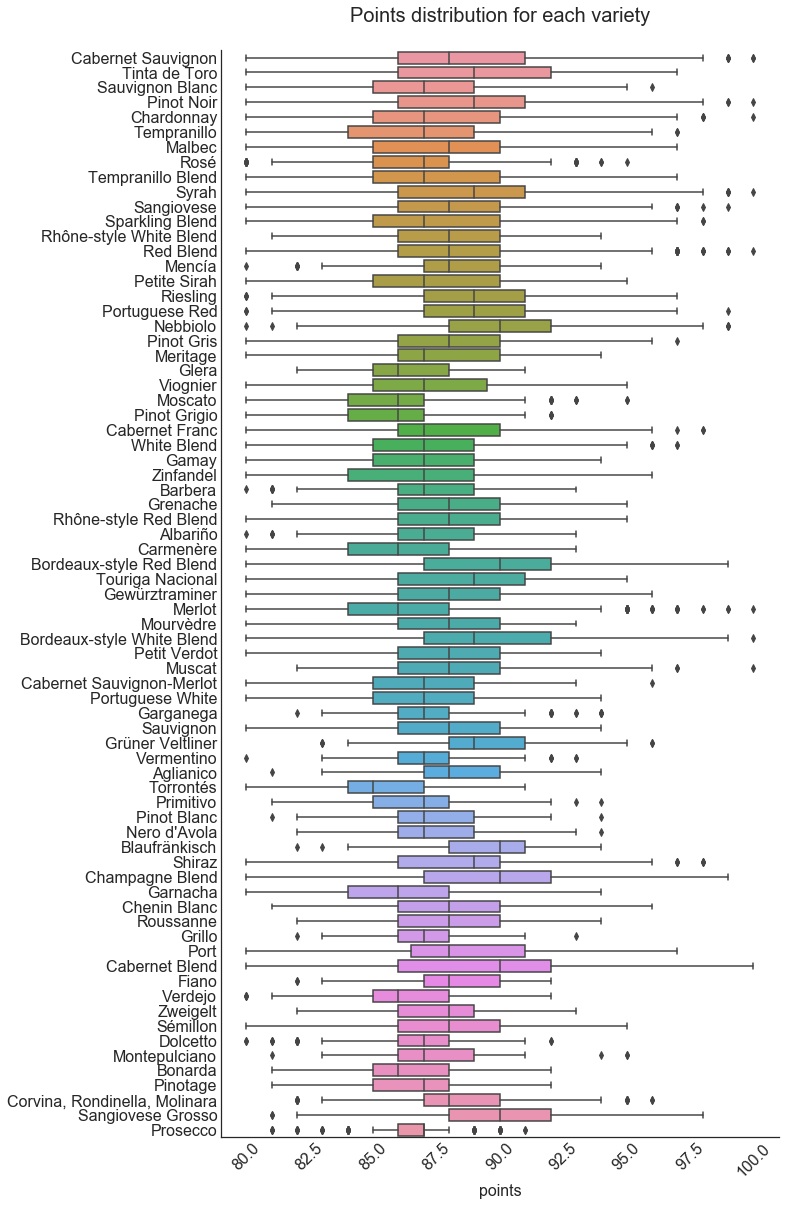

In [14]:
# Look at the point distribution for each variety that occurs more than 100 times
# (to deal with some that may appear only a few times)
varieties = data.groupby('variety').filter(lambda x: len(x) >100)
plot_distribution(varieties,"variety","points",(10,20))

There's a pretty large variety in terms of points for each variety. 

Next let's do some more visualizations.

1. Country with the best and worst wine, by points, on average.
2. Country with the most expensive and cheapest wine, on average.
3. Length of description vs price.
4. Length of description vs points.
5. Most expensive and cheapest wineries.
6. Best and worst wineries.
7. Price by variety. Maybe some varities are more expensive?
8. Points by variety. Maybe some varieties are just better?
- 7 and 8 answer another question: Is the cheapest wine also the worst? Is the best wine also the most expensive?
9. Most common words in the descriptions.
10. Most common designation.
11. Something about the most common word in the description of the best wine on average.

In [15]:
# Function to plot each category.

def category_plot(data, cat, col):
    avg = data.groupby(cat, as_index = False)[col].mean()
    avg.set_index(cat, inplace = True)
    best = avg.nlargest(5, col)
    worst = avg.nsmallest(5, col)
    fig, ax = plt.subplots(1,2,figsize = (12,3))
    # Reverse so the plot looks nicer; the "best" will be on top
    best = best.iloc[::-1]
    best.plot(kind = "barh", ax= ax[0], color="#3F5D7D",
              fontsize = 14, legend = False, title = "Best " + cat + " by " + col)
    worst.plot(kind = "barh", ax=ax[1], color="#3F5D7D",
               fontsize = 14, legend = False, title = "Worst " + cat + " by " + col)
    ax[0].title.set_size(16) # Set title size
    ax[1].title.set_size(16)
    plt.tight_layout()
    plt.show()

In [16]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [17]:
def display_dfs(data, cat, col):
    avg_df = data.groupby(cat, as_index=False)[col].mean().sort_values(by = col, ascending = False)
    avg_df = avg_df.dropna(axis = 0) # control for NaN
    # top 5
    df1 = avg_df.head()
    # bottom 5
    df2 = avg_df.tail()
    display_side_by_side(df1,df2)

# Country with the best and worst wine, by points, on average.

,country,points
14,England,92.888889
3,Austria,89.382218
15,France,88.918558
17,Germany,88.848267
7,Canada,88.724832
,country,points
13,Egypt,83.666667
5,Brazil,83.428571
30,Montenegro,82.000000
9,China,82.000000


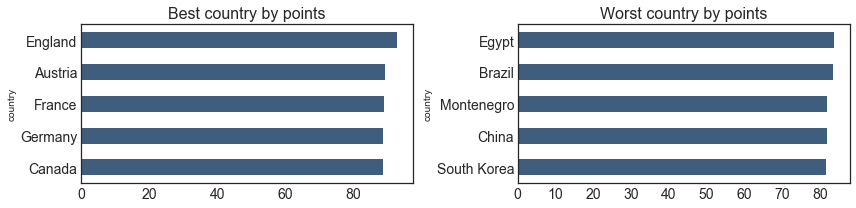

In [18]:
display_dfs(data, "country", "points")
category_plot(data, "country", "points")

Looks like England has the best wines- I didn't expect this! I thought France would come first. I'm also surprised to see that the US doesn't show up- isn't California wine supposed to be great? On the flip side, looks like South Korea isn't great at wine making, compared to other countries. But still, an average just above 80 points is still pretty good. 

# Country with the most expensive and cheapest wine, on average.

,country,price
45,US-France,50.000000
14,England,47.500000
19,Hungary,47.166667
15,France,44.910644
17,Germany,42.537787
,country,price
20,India,13.000000
4,Bosnia and Herzegovina,12.666667
6,Bulgaria,11.678571
25,Lithuania,10.000000


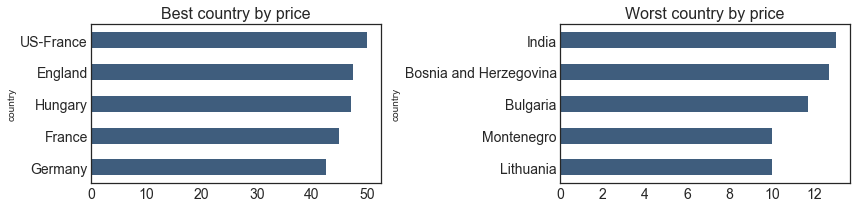

In [19]:
display_dfs(data, "country", "price")
category_plot(data, "country", "price")

Ok, so I thought wines from France and the States were the best- turns out they're just the most expensive! So we can already see, expensive does not equal better, when it comes to wine (and probably most things in life!). Similarly, the cheapeast wine doesn't mean it's necessarily the worst wine (except for Montenegro).

Let's take a look at how the price and points variables are related.

In [20]:
corr = data.corr()
print(corr)

          points     price
points  1.000000  0.447281
price   0.447281  1.000000


The linear correlation between the price and point variables is 0.45- not too high, not too low.

Now let's look more into the descriptions. I want to see how length of the description relates to price and points. First we'll have to add these columns to our dataframe. Then let's take a quick look at the columns.

In [21]:
# Description length
data["desc_length"] = data['description'].apply(len)
data["desc_num_words"] = data['description'].map(lambda x: len(x.split()))

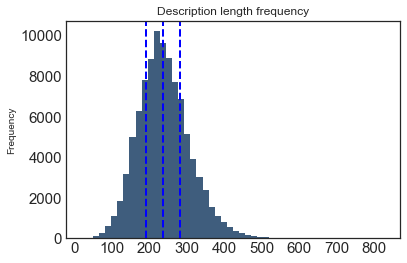

In [22]:
data.desc_length.plot(kind = 'hist', bins = 50, color = "#3F5D7D", fontsize = 15, title = "Description length frequency")
plt.axvline(data.desc_length.quantile(0.25), color='b', linestyle='dashed', linewidth=2)
plt.axvline(data.desc_length.quantile(0.5), color='b', linestyle='dashed', linewidth=2)
plt.axvline(data.desc_length.quantile(0.75), color='b', linestyle='dashed', linewidth=2)

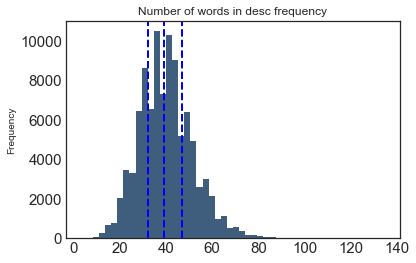

In [23]:
data.desc_num_words.plot(kind = 'hist', bins = 50, color = "#3F5D7D", fontsize = 15, title = "Number of words in desc frequency")
plt.axvline(data.desc_num_words.quantile(0.25), color='b', linestyle='dashed', linewidth=2)
plt.axvline(data.desc_num_words.quantile(0.5), color='b', linestyle='dashed', linewidth=2)
plt.axvline(data.desc_num_words.quantile(0.75), color='b', linestyle='dashed', linewidth=2)

Description length frequency is nicely normally distributed, while the number of words in the description has a few gaps in its distribution. Let's continue our analysis.

# Description length vs price, and number of words in description vs price.

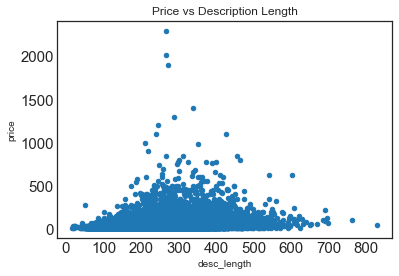

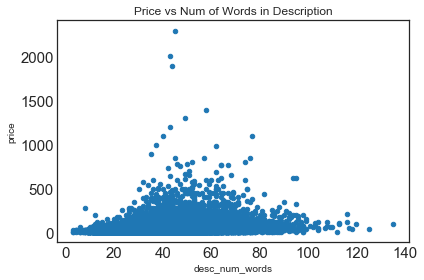

In [24]:
data.plot.scatter(y = 'price', x = 'desc_length', fontsize = 15, title = "Price vs Description Length")
data.plot.scatter(y = 'price', x = 'desc_num_words', fontsize = 15, title = "Price vs Num of Words in Description")
plt.tight_layout()
plt.show()

Both pretty normal, nothing too interesting here, they're both distributed similarly.

# Description length vs points, and number of words in description vs points.

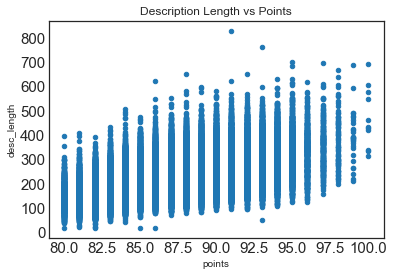

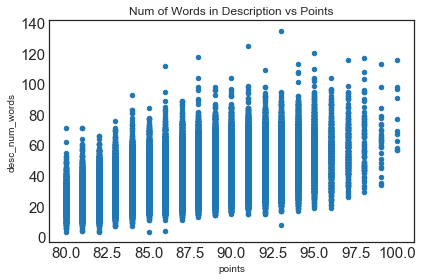

In [25]:
data.plot.scatter(x = 'points', y = 'desc_length', fontsize = 15, title = "Description Length vs Points")
data.plot.scatter(x = 'points', y = 'desc_num_words', fontsize = 15, title = "Num of Words in Description vs Points")
plt.tight_layout()
plt.show()

Again, both look pretty similar. The plot is choppy like this since points are discrete varibales. We can see very generally a trend to more points for a longer description.

# Most expensive, and cheapest wineries.

,winery,price
1173,Blair,1029.000000
3213,Château Latour,794.400000
9396,Masseto,587.500000
3144,Château La Mission Haut-Brion,568.166667
3074,Château Haut-Brion,517.777778
,winery,price
141,Adega Cooperativa da Batalha,5.0
13187,Terrenal,4.5
13411,Toca Diamonte,4.5
10441,Pam's Cuties,4.0


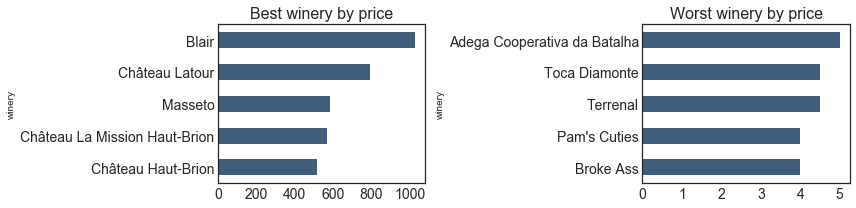

In [26]:
display_dfs(data, "winery", "price")
category_plot(data, "winery", "price")

So there are some very expensive wineries and some very cheap! I'm curious, where is Blair located, and what about Broke Ass? Is that even a place?

In [27]:
blair_country = str(data[data["winery"] == "Blair"].country)
broke_ass_country = str(data[data["winery"] == "Broke Ass"].country)
print("Blair is in " + blair_country.split()[1])
print("Broke Ass is in " + broke_ass_country.split()[1])
print("Cool.")

Blair is in US
Broke Ass is in Argentina
Cool.


# Best and worst wineries (by points).

,winery,points
12441,Sloan,100.0
9372,Mascarello Giuseppe e Figlio,99.0
5471,Domaine des Lambrays,98.0
702,Au Sommet,97.0
10340,Ovid,97.0
,winery,points
629,Aromal,80.0
1150,Black C,80.0
6045,Estrella Creek,80.0
12947,Teillery,80.0


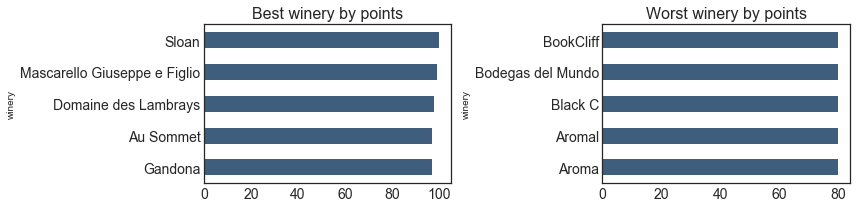

In [28]:
display_dfs(data, "winery", "points")
category_plot(data, "winery", "points")

So the best winery is not the most expensive- interesting. And where are the best and worst wineries located? (Let's just look at Aromal since it's a tie for last).

In [29]:
sloan_country = str(data[data["winery"] == "Sloan"].country)
aromal_country = str(data[data["winery"] == "Aromal"].country)
print("Sloan is in " + sloan_country.split()[1])
print("Aromal is in " + aromal_country.split()[1])
print("Cool.")

Sloan is in US
Aromal is in Spain
Cool.


So the US has both the best and the most expensive winery, but these are two differnt wineries!

Next let's look into variety.

# Price by variety. Maybe some varities are more expensive? And, is the cheapest wine also the worst? Is the best wine also the most expensive?

,variety,price
82,Cabernet-Shiraz,150.000000
330,Muscadel,100.000000
293,Mazuelo,98.500000
555,Tinto Fino,89.673077
88,Carignan-Syrah,80.000000
,variety,price
236,Királyleányka,9.0
72,Cabernet Sauvignon and Tinta Roriz,8.0
91,Carineña,8.0
387,Pigato,8.0


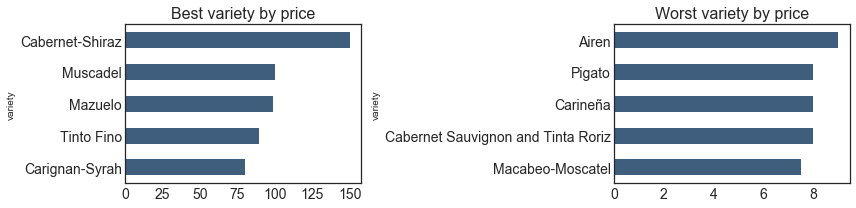

In [30]:
display_dfs(data, "variety", "price")
category_plot(data, "variety", "price")

Cabernet-Shiraz is the most expensive variety on average, while Macabeo-Moscatel is the cheapest on average. I probably drank a lot of Macabeo-Moscatel when I was in undergrad, then!

,variety,points
82,Cabernet-Shiraz,96.0
577,Trousseau Gris,93.0
45,Blauburgunder,93.0
502,Sirica,93.0
453,Roviello,92.5
,variety,points
2,Aidani,82.000000
3,Airen,81.666667
296,Meoru,81.500000
268,Malvar,81.000000


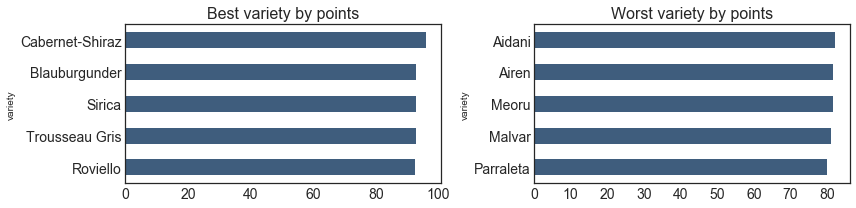

In [31]:
display_dfs(data, "variety", "points")
category_plot(data, "variety", "points")

Again, we see that price does not correlate with points necessarily. Cabernet-Shiraz is the most expensive wine and also the best on average, but the cheapest wine (Macabeo-Moscatel) is not the worst (Parraleta). Interesting.

Let's also look at the description- what word is the most common? What designation? But first- let's just look into designation a little bit. I'm not even sure what it means, to be honest.

,designation,price
5758,clos du mesnil,1400.0
22918,roger rose vineyard,1021.5
6014,colheita white,980.0
9068,el perer,770.0
15980,les quatre journaux,740.0
,designation,price
2058,barefoot on the beach white,5.0
18246,morgado da canita,5.0
25748,sul south,5.0
28152,unwined,4.0


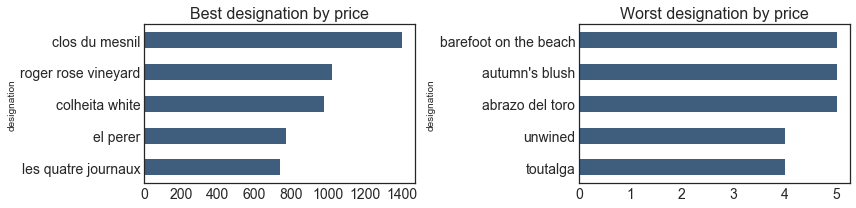

In [32]:
display_dfs(data, "designation", "price")
category_plot(data, "designation", "price")

,designation,points
5758,clos du mesnil,100.0
9254,en chamberlin vineyard,99.5
16299,litton estate vineyard,99.0
17985,monprivato,99.0
22871,rockfall,99.0
,designation,points
9780,esther,80.0
28569,vibrante red blend,80.0
25473,starlight concerto destiny vineyards,80.0
12204,hawk red,80.0


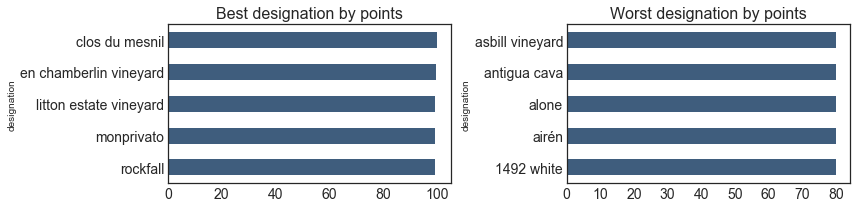

In [33]:
display_dfs(data, "designation", "points")
category_plot(data, "designation", "points")

So, Clos du Mesnil is the best and the most expensive, Toutalga is the cheapest but the worst- 1492 White is the worst. Whatever that means.

Let's take a quick look at the correlation matrix so far.

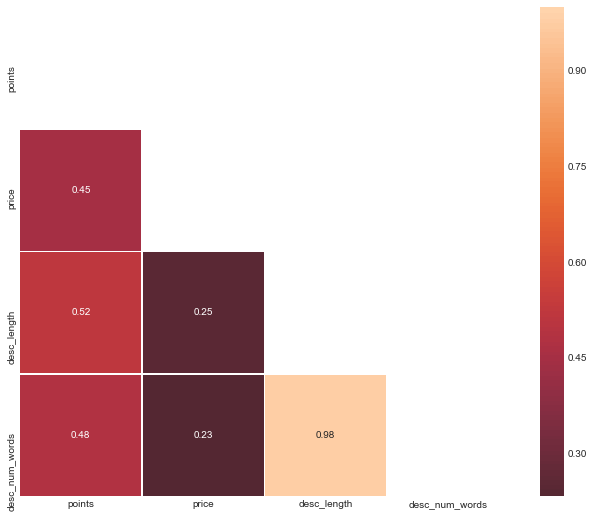

In [34]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5, annot = True)

Pearson correlation (linear correlation) between the variables is above- Price and Points are moderately correlated, Points and Description length and number of words are also moderately so. Description length and number of words are very strongly correlated, which makes sense- so I should be able to drop one of them if I want.

Finally, time to answer our last questions: What's the most common designation, and what are the most common words that come up in the descriptions? I wanted to use the wordcloud package to do this but it isn't compatible with Python 3.6, and I can't be bothered to redownload the packages for 3.5. So I'll just list out the values.

# Most common designation

In [35]:
designations = data["designation"].value_counts()
designations

reserve                                            1768
barrel sample                                      1358
reserva                                            1127
estate                                             1017
riserva                                             507
brut                                                397
estate grown                                        321
crianza                                             310
dry                                                 250
estate bottled                                      246
gran reserva                                        209
old vine                                            201
vieilles vignes                                     166
brut rosé                                           161
extra dry                                           138
bien nacido vineyard                                124
rosé                                                115
réserve                                         

Most common designations are Reserve, Barrel Sample, and Reserva.

# Most common description word

In [36]:
from collections import Counter
import nltk

In [37]:
top_N = 10

stopwords_ = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format("|".join(stopwords_))
words = (data.description
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

         Frequency
Word              
'            43019
wine         39307
flavors      30927
fruit        23383
aromas       19762
black        16074
drink        14471
ripe         13754
finish.      13601
cherry       13208


Most common word is "wine," which makes sense. Nothing really interesting here, although I guess it's a bit surprising to see "cherry" in there. Maybe a lot of the wine tastes cherry-like or has the colour of a cherry.

# Most common descriptor from the best wine producing country

Finally, what are the 5 most common words amongst English wines? Since those are the top rated on average, it may be interesting to see.

In [38]:
english_wines = data[data["country"] == "England"]
words = (english_wines.description
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt[:5])

        Frequency
Word             
apple           6
golden          4
fruit           4
subtle          4
palate          4


So apparently people like apple-y, golden, and fruity wine! That's definitely what I like!